In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import spacy
import seaborn as sns
nlp = spacy.load('en')

In [431]:
pet = pd.read_json('/Users/harishprabhala/Downloads/Pet_Supplies_5.json', lines=True)

In [432]:
pet.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1223000893,"[0, 0]",3,I purchased the Trilogy with hoping my two cat...,"01 12, 2011",A14CK12J7C7JRK,Consumer in NorCal,Nice Distraction for my cats for about 15 minutes,1294790400
1,1223000893,"[0, 0]",5,There are usually one or more of my cats watch...,"09 14, 2013",A39QHP5WLON5HV,Melodee Placial,Entertaining for my cats,1379116800
2,1223000893,"[0, 0]",4,I bought the triliogy and have tested out all ...,"12 19, 2012",A2CR37UY3VR7BN,Michelle Ashbery,Entertaining,1355875200
3,1223000893,"[2, 2]",4,My female kitty could care less about these vi...,"05 12, 2011",A2A4COGL9VW2HY,Michelle P,Happy to have them,1305158400
4,1223000893,"[6, 7]",3,"If I had gotten just volume two, I would have ...","03 5, 2012",A2UBQA85NIGLHA,"Tim Isenhour ""Timbo""",You really only need vol 2,1330905600


In [433]:
pet = pet[['overall','summary']]

In [434]:
pet.isnull().sum()

overall    0
summary    0
dtype: int64

In [435]:
pet['summary'].head()

0    Nice Distraction for my cats for about 15 minutes
1                             Entertaining for my cats
2                                         Entertaining
3                                   Happy to have them
4                           You really only need vol 2
Name: summary, dtype: object

In [436]:
pet.head()

,overall,summary
0,3,Nice Distraction for my cats for about 15 minutes
1,5,Entertaining for my cats
2,4,Entertaining
3,4,Happy to have them
4,3,You really only need vol 2


In [437]:
pet['overall'].mean()

4.229744798398338

In [438]:
pet.groupby('overall')['summary'].count()

overall
1     8748
2     8907
3    15933
4    27995
5    96253
Name: summary, dtype: int64

In [439]:
pet["overall"] = pet["overall"].apply(lambda x: '1' if x > 3 else '0') 

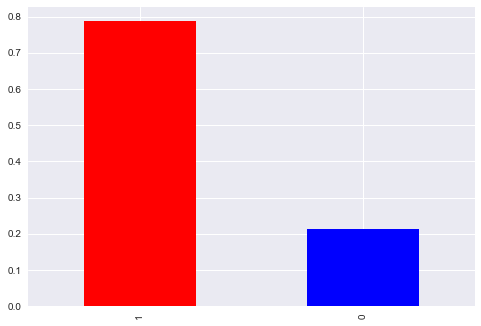

In [440]:
pet['overall'].value_counts('1').plot(kind='Bar', color=['r','b'])

In [13]:
pet['overall'].value_counts('1')*100

1    78.719684
0    21.280316
Name: overall, dtype: float64

In [441]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer

nlp = spacy.load('en')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harishprabhala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [442]:
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [443]:
tokens = pet["summary"].apply(nltk.word_tokenize)

In [444]:
tokens.count()

157836

In [445]:
tokens.head()

0    [Nice, Distraction, for, my, cats, for, about,...
1                        [Entertaining, for, my, cats]
2                                       [Entertaining]
3                              [Happy, to, have, them]
4                    [You, really, only, need, vol, 2]
Name: summary, dtype: object

In [648]:
def preprocess (eachline):
    sentence = eachline.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    stop_words = (w for w in tokens if not w in stop)
    clean_words =(w for w in tokens if not w.isnumeric())
    return ' '.join(clean_words)

In [649]:
cleaned_reviews = []
for w in pet['summary']:
    cleaned_reviews.append(preprocess(w))

In [448]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [630]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer()
Xtfidf=tfidfvectorizer.fit_transform(cleaned_reviews)

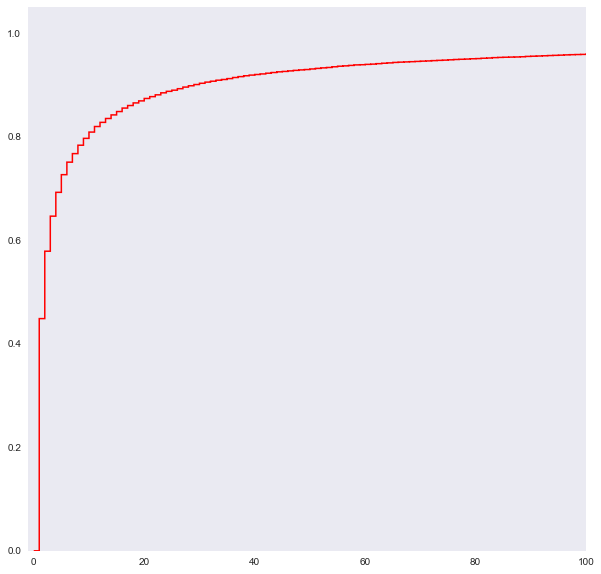

In [494]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df = list((Xtfidf > 0).sum(0).tolist()[0])
c = pd.Series(df)
y = np.arange(c.sum())
plt.hist(c,y,normed=1, histtype='step', color='r', cumulative=True, linewidth=1.5, )
plt.xlim(-1,100)
plt.grid()

In [650]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer1 = TfidfVectorizer()
X_clean=tfidfvectorizer1.fit_transform(cleaned_reviews)
y_clean = (pet.overall)

In [609]:
idf = tfidfvectorizer1.idf_
idf_score =(dict(zip(tfidfvectorizer1.get_feature_names(), idf)))

In [610]:
a = pd.DataFrame.from_dict(idf_score, orient='index')

In [611]:
a.columns = ['Score']

In [612]:
a.sort_values('Score', ascending=False).head(10)

,Score
zzzzz,12.276171
favorably,12.276171
promo,12.276171
fearless,12.276171
feared,12.276171
prompted,12.276171
fcats,12.276171
favrite,12.276171
favporite,12.276171
favourites,12.276171


In [482]:
from sklearn.cross_validation import StratifiedKFold

In [651]:
kf = StratifiedKFold(y_clean,n_folds=5, shuffle=True)
for train, test in kf:
    X1cl_train, X1cl_test = X_clean[train], X_clean[test]
    y1cl_train, y1cl_test = y_clean[train], y_clean[test]

In [652]:
X1cl_train.shape, X1cl_test.shape, y1cl_train.shape, y1cl_test.shape

((126270, 17821), (31566, 17821), (126270,), (31566,))

In [653]:
clf1=MultinomialNB(alpha=0.1)
clf1.fit(X1cl_train,y1cl_train)
print ('Accuracy of test data: ',(accuracy_score(clf1.predict(X1cl_test), y1cl_test)))
print ('Accuracy of training data: ',(accuracy_score(clf1.predict(X1cl_train), y1cl_train)))
print("\n")
print ('Classification report summary of MultinomialDB with alpha = 0.01:')
print(classification_report(clf1.predict(X1cl_test), y1cl_test))

Accuracy of test data:  0.855255654818
Accuracy of training data:  0.881555397165


Classification report summary of MultinomialDB with alpha = 0.01:
             precision    recall  f1-score   support

          0       0.47      0.76      0.58      4208
          1       0.96      0.87      0.91     27358

avg / total       0.89      0.86      0.87     31566



In [654]:
y_true_MNB = np.array(y1cl_test).astype(int)
y_pred_MNB = np.array(clf1.predict(X1cl_test)).astype(int)
MultinomialNB_auc = roc_auc_score(y_true_MNB, y_pred_MNB)
MultinomialNB_auc

0.71583876214838738

In [520]:
fpr1,tpr1,_ = roc_curve(y_true_MNB, y_pred_MNB)

In [487]:
from sklearn.linear_model import LogisticRegression
from sklearn import grid_search
from sklearn.model_selection import GridSearchCV

In [488]:
Cs = [0.001, 0.1, 1, 10, 100]
parameters = {'C':Cs}
log = LogisticRegression()
clf2 = grid_search.GridSearchCV(log, parameters)

In [489]:
samplex = X1cl_train[:80000]
sampley = y1cl_train[:80000]

In [470]:
clf2.fit(samplex,sampley)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [471]:
clf2.best_params_

{'C': 1}

In [655]:
logit=LogisticRegression(C=10)
logit.fit(X1cl_train,y1cl_train)
print ('Accuracy of test data: ',(accuracy_score(logit.predict(X1cl_test), y1cl_test)))
print ('Accuracy of training data: ',(accuracy_score(logit.predict(X1cl_train), y1cl_train)))
print("\n")
print ('Classification report summary of Logistic Regression C=1:')
print(classification_report(logit.predict(X1cl_test), y1cl_test))

Accuracy of test data:  0.877716530444
Accuracy of training data:  0.907887859349


Classification report summary of Logistic Regression C=1:
             precision    recall  f1-score   support

          0       0.62      0.76      0.68      5433
          1       0.95      0.90      0.92     26133

avg / total       0.89      0.88      0.88     31566



In [477]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [656]:
y_true_auc = np.array(y1cl_test).astype(int)

In [657]:
y_pred_auc = np.array(logit.predict(X1cl_test)).astype(int)

In [658]:
Logistic_auc = roc_auc_score(y_true_auc, y_pred_auc)
fpr2,tpr2,_ = roc_curve(y_true_auc, y_pred_auc)
Logistic_auc

0.7826289457371205

In [659]:
from sklearn.tree import DecisionTreeClassifier

In [570]:
dtree=DecisionTreeClassifier(max_depth=200, criterion='entropy')
dtree.fit(X1cl_train,y1cl_train)
print ('Accuracy of test data: ',(accuracy_score(dtree.predict(X1cl_test), y1cl_test)))
print ('Accuracy of training data: ',(accuracy_score(dtree.predict(X1cl_train), y1cl_train)))
print("\n")
print ('Classification report summary of Decision Tree:')
print(classification_report(dtree.predict(X1cl_test), y1cl_test))

Accuracy of test data:  0.866343534182
Accuracy of training data:  0.942409123307


Classification report summary of Decision Tree:
             precision    recall  f1-score   support

          0       0.56      0.75      0.64      5074
          1       0.95      0.89      0.92     26492

avg / total       0.89      0.87      0.87     31566



In [571]:
y_true_auc3 = np.array(y1cl_test).astype(int)
y_pred_auc3 = np.array(dtree.predict(X1cl_test)).astype(int)
DecisionTree_auc = roc_auc_score(y_true_auc3, y_pred_auc3)
fpr3,tpr3,_ = roc_curve(y_true_auc3, y_pred_auc3)
DecisionTree_auc

0.75590570619565856

In [339]:
from sklearn.ensemble import RandomForestClassifier 

In [566]:
random=RandomForestClassifier(n_estimators=40)
random.fit(X1cl_train,y1cl_train)
print ('Accuracy of test data: ',(accuracy_score(random.predict(X1cl_test), y1cl_test)))
print ('Accuracy of training data: ',(accuracy_score(random.predict(X1cl_train), y1cl_train)))
print("\n")
print ('Classification report summary of RandomForest:')
print(classification_report(random.predict(X1cl_test), y1cl_test))

Accuracy of test data:  0.88459101565
Accuracy of training data:  0.983939177952


Classification report summary of RandomForest:
             precision    recall  f1-score   support

          0       0.62      0.79      0.69      5226
          1       0.96      0.90      0.93     26340

avg / total       0.90      0.88      0.89     31566



In [567]:
y_true_auc4 = np.array(y1cl_test).astype(int)
y_pred_auc4 = np.array(random.predict(X1cl_test)).astype(int)
RandomForest_auc=roc_auc_score(y_true_auc4, y_pred_auc4)
fpr4,tpr4,_ = roc_curve(y_true_auc4, y_pred_auc4)
RandomForest_auc

0.78726690092481943

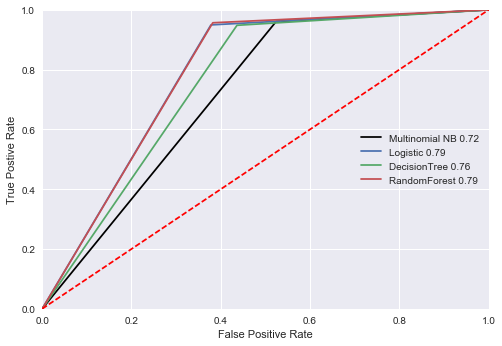

In [577]:
plt.plot(fpr1,tpr1, label=('Multinomial NB %.2f' %MultinomialNB_auc), color='k')
plt.plot(fpr2,tpr2, label=('Logistic %.2f' %Logistic_auc))
plt.plot(fpr3,tpr3, label=('DecisionTree %.2f' %DecisionTree_auc))
plt.plot(fpr4,tpr4, label=('RandomForest %.2f' %RandomForest_auc))
plt.legend(loc='right')
plt.plot([0,1],[0,1],'r--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('True Postive Rate')
plt.xlabel('False Positive Rate')
plt.show()